In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Polynomial Regression
#y = a + bx + cx^2 + ... + nx^n + ...

In [6]:
dataset = pd.read_csv('/kaggle/input/position-salaries-csv/Position_Salaries.csv')
dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
dataset = dataset.drop(['Position'], axis = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Level   10 non-null     int64
 1   Salary  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [9]:
import warnings
warnings.filterwarnings('ignore')

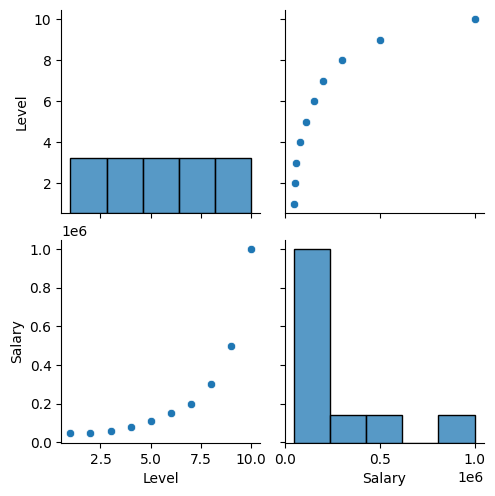

In [10]:
sns.pairplot(dataset)
plt.show()

In [12]:
X = dataset.drop(['Salary'], axis = True)
y = dataset['Salary']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [19]:
r2_train = lin_reg.score(X_train, y_train)
r2 = lin_reg.score(X_test, y_test) #1'e ne kadar yakınsa o kadar iyi tahmindir. 

print("Training threshold:", r2_train*100)
print("Testing threshold:", r2*100)

Training threshold: 63.660492765708675
Testing threshold: 84.51346684575974


In [20]:
#Polynomial Reg. modelini kurma
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.transform(X_test)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression()

In [22]:
r2_train = lin_reg_2.score(X_poly, y_train)
r2 = lin_reg_2.score(X_poly_test, y_test) 

print("Training threshold:", r2_train*100)
print("Testing threshold:", r2*100)

Training threshold: 99.95857211026754
Testing threshold: 97.14666803839755


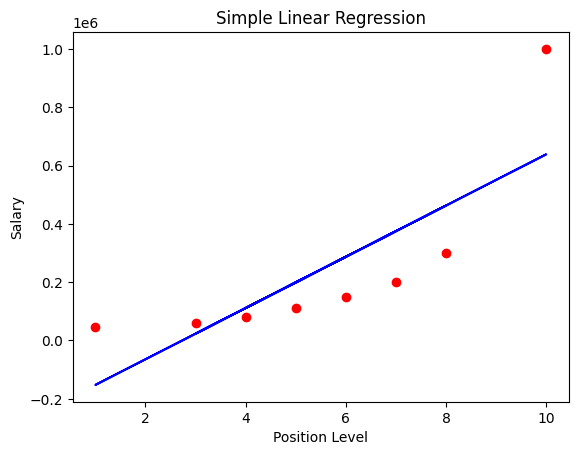

In [23]:
#Başarısız Basit Lineer Regresyon Modeli
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('Simple Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

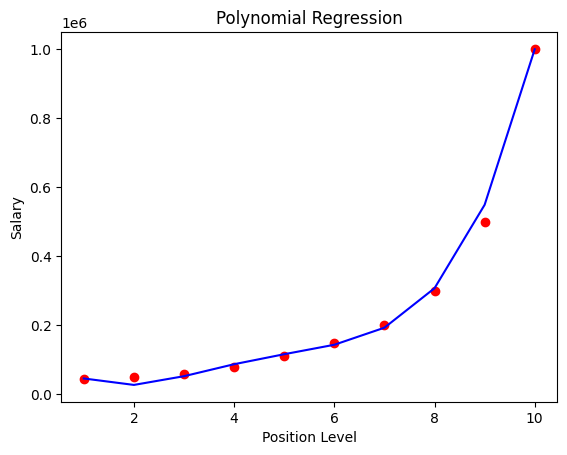

In [24]:
#Polinom Regresyonu 
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [25]:
#Multiple Regression
#y = b0 + b1*x1 + b2*x2 + ... + bn*xn + ...

In [26]:
dataset = pd.read_csv('/kaggle/input/50-startups-csv/50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [27]:
dataset = dataset.drop('State', axis = True)
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


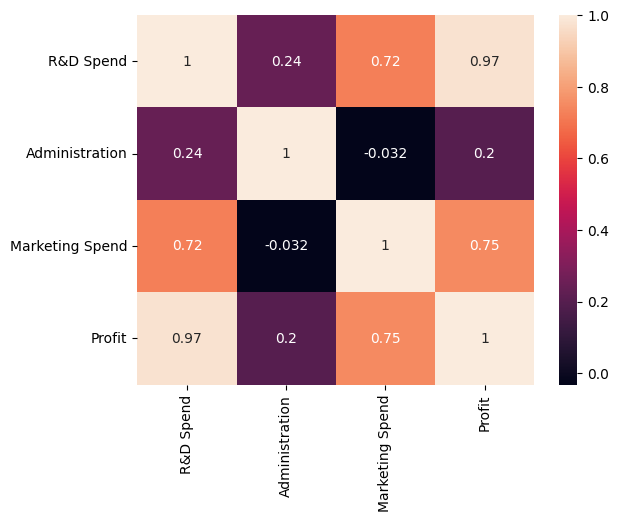

In [29]:
corr = dataset.corr()
sns.heatmap(corr, annot = True)
plt.show()

In [30]:
#Veri üzerindeki ön işlemler
X = dataset.drop('Profit', axis = True)
y = dataset['Profit']

In [31]:
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [32]:
#Normalizasyon (MinMaxScaler) - Standardizasyon (StandardScaler)
"""
z-score = x - mean / std.dev.
"""
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [33]:
X

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01],
       [ 6.20398248e-01, -3.87599089e-01,  1.49807267e-01],
       [ 5.93085418e-01, -1.06553960e+00,  3.19833623e-01],
       [ 4.43259872e-01,  2.15449064e-01,  3.20617441e-01],
       [ 4.02077603e-01,  5.10178953e-01,  3.43956788e-01],
       [ 1.01718075e+00,  1.26919939e+00,  3.75742273e-01],
       [ 8.97913123e-01,  4.58678535e-02,  4.19218702e-01],
       [ 9.44411957e-02,  9.11841968e-03

In [34]:
formatted_X = np.round(X, 2)
print(formatted_X)

[[ 2.02  0.56  2.15]
 [ 1.96  1.08  1.92]
 [ 1.75 -0.73  1.63]
 [ 1.55 -0.1   1.42]
 [ 1.5  -1.08  1.28]
 [ 1.28 -0.78  1.25]
 [ 1.34  0.93 -0.69]
 [ 1.25  0.87  0.93]
 [ 1.03  0.99  0.83]
 [ 1.09 -0.46  0.78]
 [ 0.62 -0.39  0.15]
 [ 0.59 -1.07  0.32]
 [ 0.44  0.22  0.32]
 [ 0.4   0.51  0.34]
 [ 1.02  1.27  0.38]
 [ 0.9   0.05  0.42]
 [ 0.09  0.01  0.44]
 [ 0.46  0.86  0.59]
 [ 0.4  -0.26  0.69]
 [ 0.28  1.16 -1.74]
 [ 0.06 -0.27  0.72]
 [ 0.1   1.17  0.73]
 [ 0.01  0.05  0.76]
 [-0.14 -0.56  0.77]
 [ 0.07 -0.8  -0.58]
 [-0.2   0.66 -0.6 ]
 [ 0.04  0.82 -0.64]
 [-0.04  0.24  1.17]
 [-0.17  2.21 -0.77]
 [-0.18  1.14 -0.86]
 [-0.26 -0.21 -0.99]
 [-0.28  1.13 -1.01]
 [-0.23  0.28 -1.36]
 [-0.4  -0.66  0.03]
 [-0.6   1.31 -0.  ]
 [-0.61 -1.31 -0.05]
 [-0.99  0.21 -0.08]
 [-0.65 -2.53 -0.12]
 [-1.18 -2.   -0.21]
 [-0.77 -1.38 -0.3 ]
 [-0.99 -0.1  -0.32]
 [-1.01 -1.32 -0.38]
 [-1.1  -0.91 -0.52]
 [-1.28  0.22 -1.45]
 [-1.13  1.21 -1.51]
 [-1.6   0.1  -1.73]
 [-1.59 -0.2   0.71]
 [-1.62  0.51

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [36]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = regressor.predict(X_test).round(1)

In [38]:
hesaplama = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Original Profit', 'Predicted Profit'])
hesaplama.head(5)

,Original Profit,Predicted Profit
0,103282.38,103901.9
1,144259.40,132763.1
2,146121.95,133567.9
3,77798.83,72911.8
4,191050.39,179627.9


In [41]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

r2

0.9393957642536921

In [42]:
#Test model
regressor.intercept_

111297.71256204927

In [43]:
regressor.coef_

array([35391.2501208 ,   815.21987542,  4202.06618916])

In [45]:
feature = [165349.20, 136897.80, 471784.10]
scale_feature = sc.transform([feature])
scale_feature

array([[2.01641149, 0.56075291, 2.15394309]])

In [46]:
y_pred_test = regressor.predict(scale_feature)
y_pred_test #orjinali 192261.83

array([192169.18440985])

In [47]:
#Sınıflandırma (Classification)
#Bir ML sınıflandırma modeli için performans metrikleri
"""
1- Confusion Matrix (Karmaşıklık Matrisi)
2- Accuracy (Başarım)
3- Precision (Kesinlik)
4- Recall (Hatırlama)
5- Specificity
6- F1-Score
7- AUC/ROC curves
"""

'\n1- Confusion Matrix (Karmaşıklık Matrisi)\n2- Accuracy (Başarım)\n3- Precision (Kesinlik)\n4- Recall (Hatırlama)\n5- Specificity\n6- F1-Score\n7- AUC/ROC curves\n'

In [48]:
#K-Nearest Neighbor (K-En Yakın Komşu Algoritması)
data = pd.read_csv('/kaggle/input/data-cleaned-csv/data_cleaned.csv')
data.shape

(891, 25)

In [49]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [50]:
x = data.drop(['Survived'], axis = 1)
y = data['Survived']
x.shape, y.shape

((891, 24), (891,))

In [ ]:
#pipeline, grid search (hiperparametre ayarlama)